<a href="https://www.kaggle.com/code/fakhrizalahadiat/eda-instant-noodle-consumptions?scriptVersionId=145306608" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-instant-noodles-consumption-2022/noodles.csv


## Load Data

In [2]:
df = pd.read_csv("/kaggle/input/world-instant-noodles-consumption-2022/noodles.csv")
df.head()

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population
0,China,40250.0,41450.0,46360.0,43990,45070.0,1,CHN,China,Beijing,Asia,1425887337
1,Indonesia,12540.0,12520.0,12640.0,13270,14260.0,4,IDN,Indonesia,Jakarta,Asia,275501339
2,India,6060.0,6730.0,6730.0,7560,7580.0,2,IND,India,New Delhi,Asia,1417173173
3,Japan,5780.0,5630.0,5970.0,5850,5980.0,11,JPN,Japan,Tokyo,Asia,123951692
4,Philippines,3980.0,3850.0,4470.0,4440,4290.0,13,PHL,Philippines,Manila,Asia,115559009


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Region     53 non-null     object 
 1   2018               52 non-null     float64
 2   2019               52 non-null     float64
 3   2020               52 non-null     float64
 4   2021               53 non-null     int64  
 5   2022               52 non-null     float64
 6   Rank               53 non-null     int64  
 7   CCA3               53 non-null     object 
 8   Country/Territory  53 non-null     object 
 9   Capital            53 non-null     object 
 10  Continent          53 non-null     object 
 11  2022 Population    53 non-null     int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 5.1+ KB


There several column have missing value and there are redundant column ("Country/Region and "Country/Territory) so we can drop one of the columns also because we have population column we can create a per capita column

## Data Preparation

In [4]:
#calculate missing values
df.isna().sum()/df.shape[0]*100

Country/Region       0.000000
2018                 1.886792
2019                 1.886792
2020                 1.886792
2021                 0.000000
2022                 1.886792
Rank                 0.000000
CCA3                 0.000000
Country/Territory    0.000000
Capital              0.000000
Continent            0.000000
2022 Population      0.000000
dtype: float64

In [5]:
#calculate missing values
(df.shape[0] - df.dropna().shape[0])/df.shape[0]*100

3.7735849056603774

only 3.77% missing value so we can drop missing values

In [6]:
#drop missing values
df = df.dropna()

In [7]:
#duplicate checking
df.duplicated().sum()

0

No duplicated Data

In [8]:
#drop redundant column and keep one of them
df = df.drop("Country/Territory", axis = 1)
df.head(3)

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Capital,Continent,2022 Population
0,China,40250.0,41450.0,46360.0,43990,45070.0,1,CHN,Beijing,Asia,1425887337
1,Indonesia,12540.0,12520.0,12640.0,13270,14260.0,4,IDN,Jakarta,Asia,275501339
2,India,6060.0,6730.0,6730.0,7560,7580.0,2,IND,New Delhi,Asia,1417173173


Column Country/Territory has been dropped

In [9]:
df["percapita"] = 1e6 * df["2022"] / df["2022 Population"]
df.head(3)

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Capital,Continent,2022 Population,percapita
0,China,40250.0,41450.0,46360.0,43990,45070.0,1,CHN,Beijing,Asia,1425887337,31.608388
1,Indonesia,12540.0,12520.0,12640.0,13270,14260.0,4,IDN,Jakarta,Asia,275501339,51.760184
2,India,6060.0,6730.0,6730.0,7560,7580.0,2,IND,New Delhi,Asia,1417173173,5.348676


## Statistic Descriptive

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2018,51.0,1.811373e+03,5.904068e+03,1.000000e+01,5.000000e+01,1.900000e+02,9.750000e+02,4.025000e+04
2019,51.0,1.862745e+03,6.065603e+03,1.000000e+01,5.500000e+01,2.100000e+02,1.000000e+03,4.145000e+04
2020,51.0,2.022157e+03,6.721813e+03,0.000000e+00,6.500000e+01,2.200000e+02,1.015000e+03,4.636000e+04
2021,51.0,2.020784e+03,6.436950e+03,1.000000e+01,6.500000e+01,2.700000e+02,1.130000e+03,4.399000e+04
2022,51.0,2.085882e+03,6.613804e+03,1.000000e+01,7.000000e+01,2.800000e+02,1.195000e+03,4.507000e+04
Rank,51.0,4.468627e+01,3.604857e+01,1.000000e+00,1.550000e+01,3.300000e+01,6.700000e+01,1.240000e+02
2022 Population,51.0,1.179048e+08,2.737849e+08,5.180829e+06,1.862095e+07,4.551032e+07,9.977034e+07,1.425887e+09
percapita,51.0,1.478601e+01,1.771584e+01,2.197304e-01,2.815470e+00,6.064517e+00,1.892197e+01,7.623156e+01


Mean and Max in numerical data appear to be normal

In [11]:
df.select_dtypes("object").describe()

,Country/Region,CCA3,Capital,Continent
count,51,51,51,51
unique,51,51,51,6
top,China,CHN,Beijing,Asia
freq,1,1,1,21


1. The country with the largest population is China and capital is Beijing
2. The continent with the largest population is Asia

## Exploratory Data Analysis

## Univariate Analysis

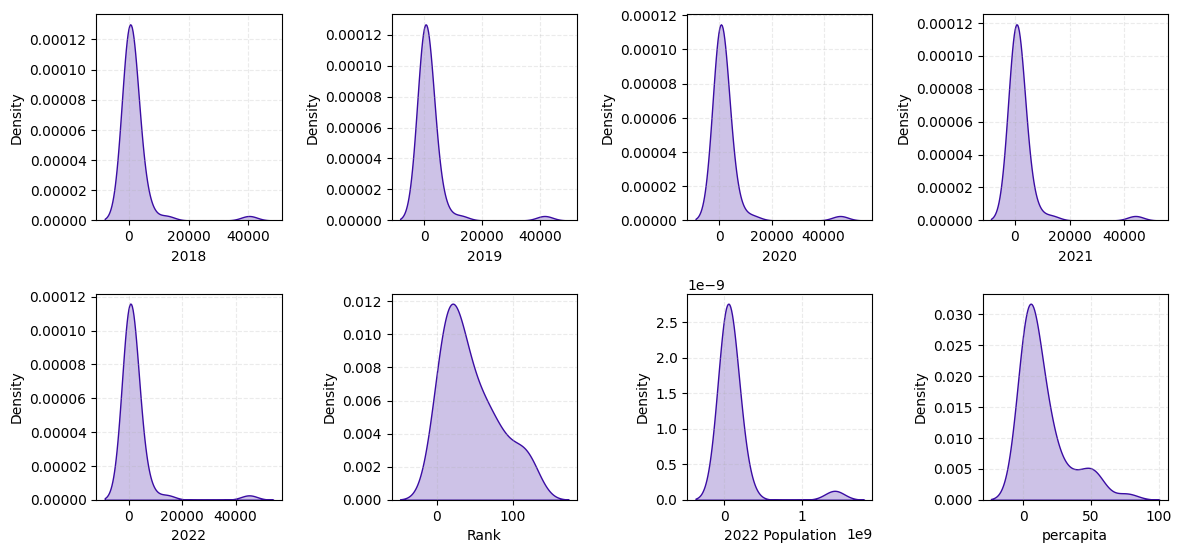

In [12]:
from plotly.subplots import make_subplots
numeric = df.select_dtypes(["int","float"]).columns
plt.figure(figsize=(12,8))

for i in range(len(numeric)):
    plt.subplot(3, len(numeric)//2, i+1)
    plt.grid(True, linestyle = "dashed", alpha = .25)
    fig = sns.kdeplot(x = df[numeric[i]], fill=True, color="#3A0CA3")
plt.tight_layout()
plt.show()


Distribution numerical data tends to be normal with a few outliers on the right

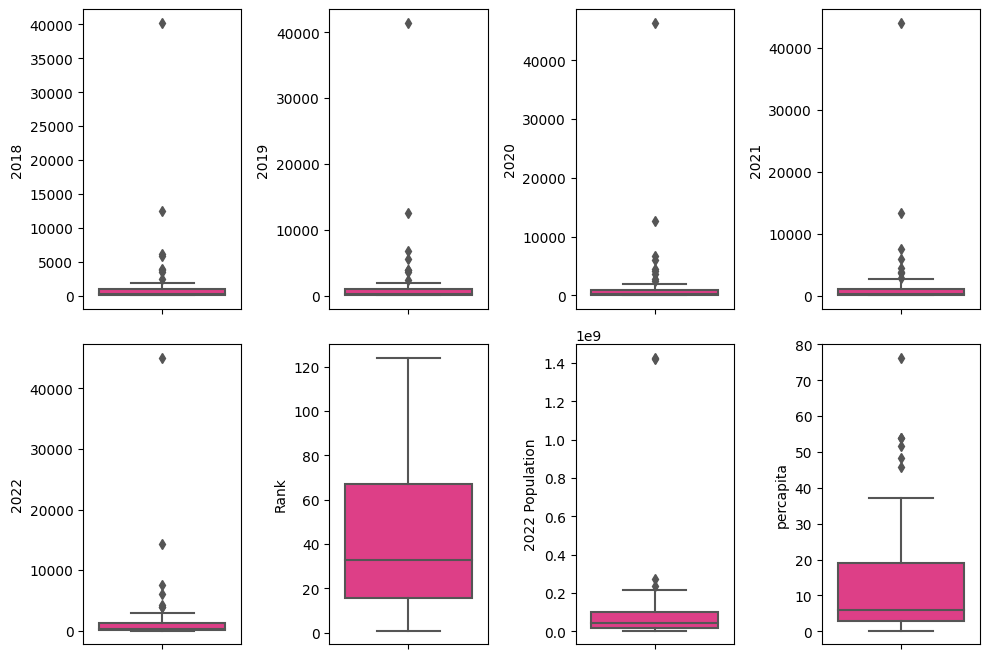

In [13]:
plt.figure(figsize = (10,10))
for i in range(len(numeric)):
    plt.subplot(3, len(numeric)//2, i+1)
    sns.boxplot(data = df, y = numeric[i], color="#F72585")
plt.tight_layout()


There several column that have outlier so we can drop it later

### Year on Year Noodle Consumption

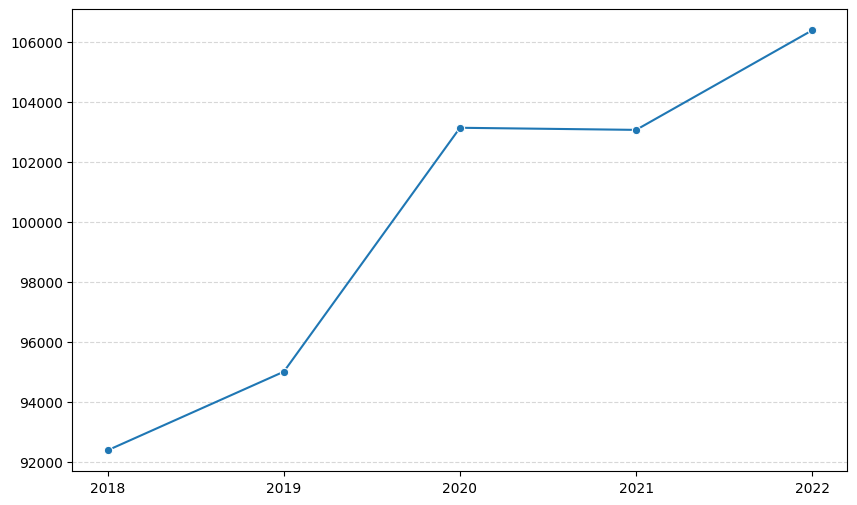

In [14]:
plt.figure(figsize = (10,6))
sns.lineplot(df[["2018","2019","2020","2021","2022"]].sum(), marker = "o")
plt.grid(axis = "y", alpha = 0.5, linestyle ="dashed")
plt.show()

as we can see year by year instant noodle consumption is increase

### Which continent consumes the most instant noodles and which continent consumes the least.

In [15]:
df_continent = df.groupby("Continent").agg(sum_consumption  = ("2022", "sum")).reset_index().sort_values(ascending =False, by = "sum_consumption")
df_continent

,Continent,sum_consumption
1,Asia,93190.0
0,Africa,4000.0
2,Europe,3520.0
5,South America,3120.0
3,North America,2000.0
4,Oceania,550.0


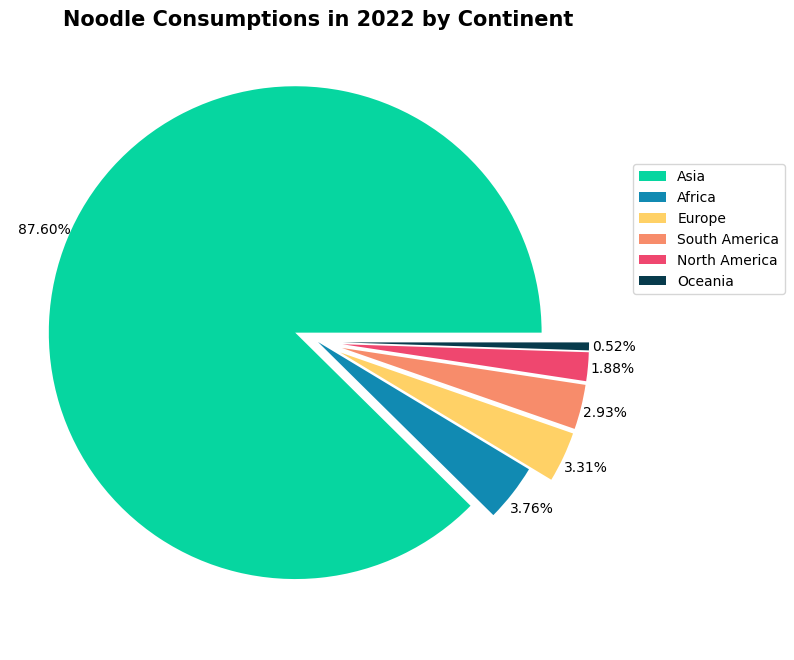

In [16]:
plt.figure(figsize=(8,8))
explode = (0.1, 0, 0.1, 0.1, 0.1, 0.1)
color = ["#06D6A0","#118AB2","#FFD166","#F78C6B","#EF476F","#073B4C"]
ax = plt.pie(df_continent["sum_consumption"], autopct="%1.2f%%", explode=explode, pctdistance=1.1, colors=color)
plt.title("Noodle Consumptions in 2022 by Continent", fontdict={"fontsize":15,
                                                       "fontweight":"bold"})
plt.legend(df_continent["Continent"], loc="best", bbox_to_anchor=(1, 0.8))
plt.show()

Asian continent consumes the most instant noodles and the Oceania continent the least. Asian continent dominates in instant noodle consumption by **87.60%** or around **90 million dollar US** by 2022 is probably the biggest factor influenced by a larger population than other continents and cultural influences in Asia where the majority of food is noodles because this food can be served easily, quickly and simply

### Does population have an effect on noodle consumption?

In [17]:
from sklearn.preprocessing import LabelEncoder
df_corr = df[["2022","2022 Population","Continent"]].copy()
df_corr["Continent"] = LabelEncoder().fit_transform(df_corr["Continent"])

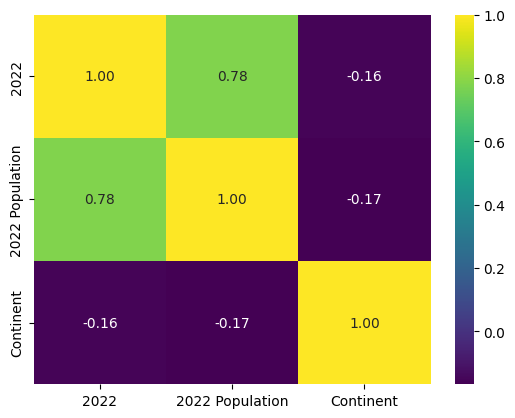

In [18]:
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="viridis")
plt.show()

as we can see population has strong correlation with noodle consumption around **0.75%** and weakly negative correlation with continent indicating that is almost no correlation between population and continent

## Bivariate Analysis

### Which 10 countries the most noodles consumption in 2022?

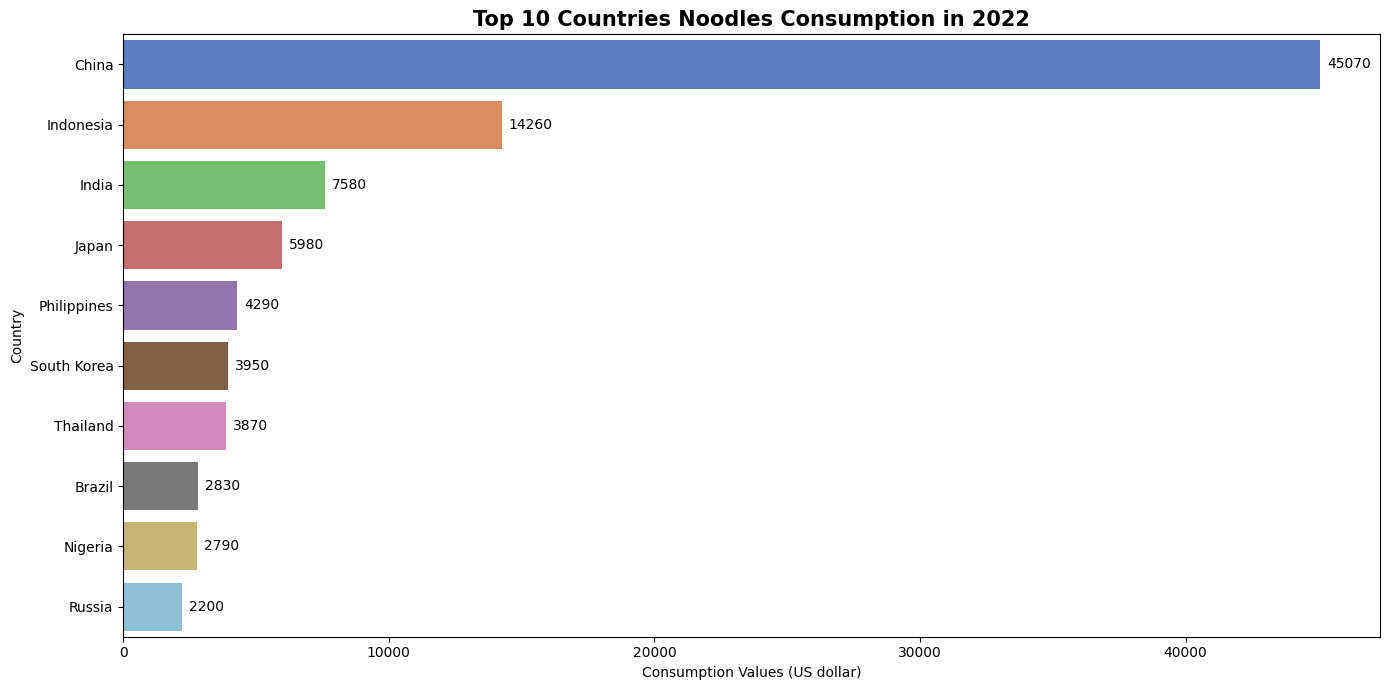

In [19]:
plt.figure(figsize=(14,7))
ax = sns.barplot(data = df.head(10), y = "Country/Region", 
                 x = "2022", palette = "muted")
ax.bar_label(ax.containers[0], color = "black", padding=5)
plt.title("Top 10 Countries Noodles Consumption in 2022", 
          fontdict={"fontsize" : 15,
                   "fontweight": "bold"})
plt.ylabel("Country")
plt.xlabel("Consumption Values (US dollar)")
plt.tight_layout()
plt.show()

It can be seen that the 10 countries that spend the most money on noodle consumption several dominated by countries on the Asian continent. The first position is led by China, followed by Indonesia and India

### Year by year growth noodle consumption in Top 10 Country

First change each year's column to one column using melt so we can see the number of countries consuming instant noodles from year to year

In [20]:
#melt column each year become one 
condition = df.select_dtypes(["object","float","int"]).columns[:8]
df2  = df[condition]
df_melt = df2.melt(id_vars = ["Country/Region","Rank","CCA3"],
                  var_name="Year",
                  value_name = "Consumption_indollar")
df_melt.head(3)

,Country/Region,Rank,CCA3,Year,Consumption_indollar
0,China,1,CHN,2018,40250.0
1,Indonesia,4,IDN,2018,12540.0
2,India,2,IND,2018,6060.0


In [21]:
country_condition = df_melt["CCA3"].isin(["CHN","IDN","IND","JPN","PHL","KOR","THA","BRA","NGA","RUS"])

df_YOY = df_melt[country_condition]

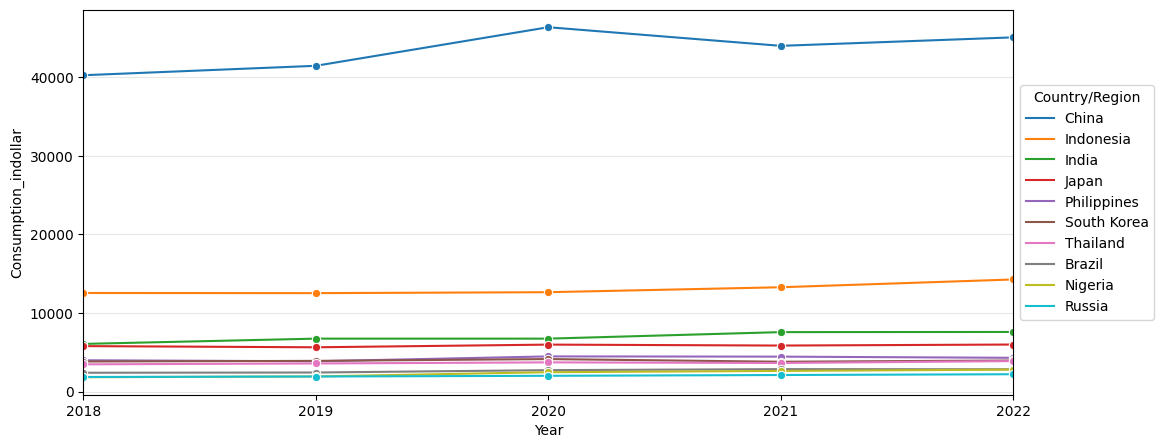

In [22]:
plt.figure(figsize = (12,5))
ax = sns.lineplot(data = df_YOY, x = "Year", y="Consumption_indollar", hue="Country/Region", marker = "o")
legend = plt.legend(title="Country/Region", loc="center left", bbox_to_anchor=(1, 0.5))
ax.grid(axis = "y", alpha = 0.3)
ax.set_xlim(0, df_YOY.index[4])
plt.show()

It can be seen that the 10 countries that spend the most money on noodle consumption is almost stable every year, which is different from China, which experienced the highest increase in 2020.

### Which 10 countries the most noodles consumption in 2022 per Capita?

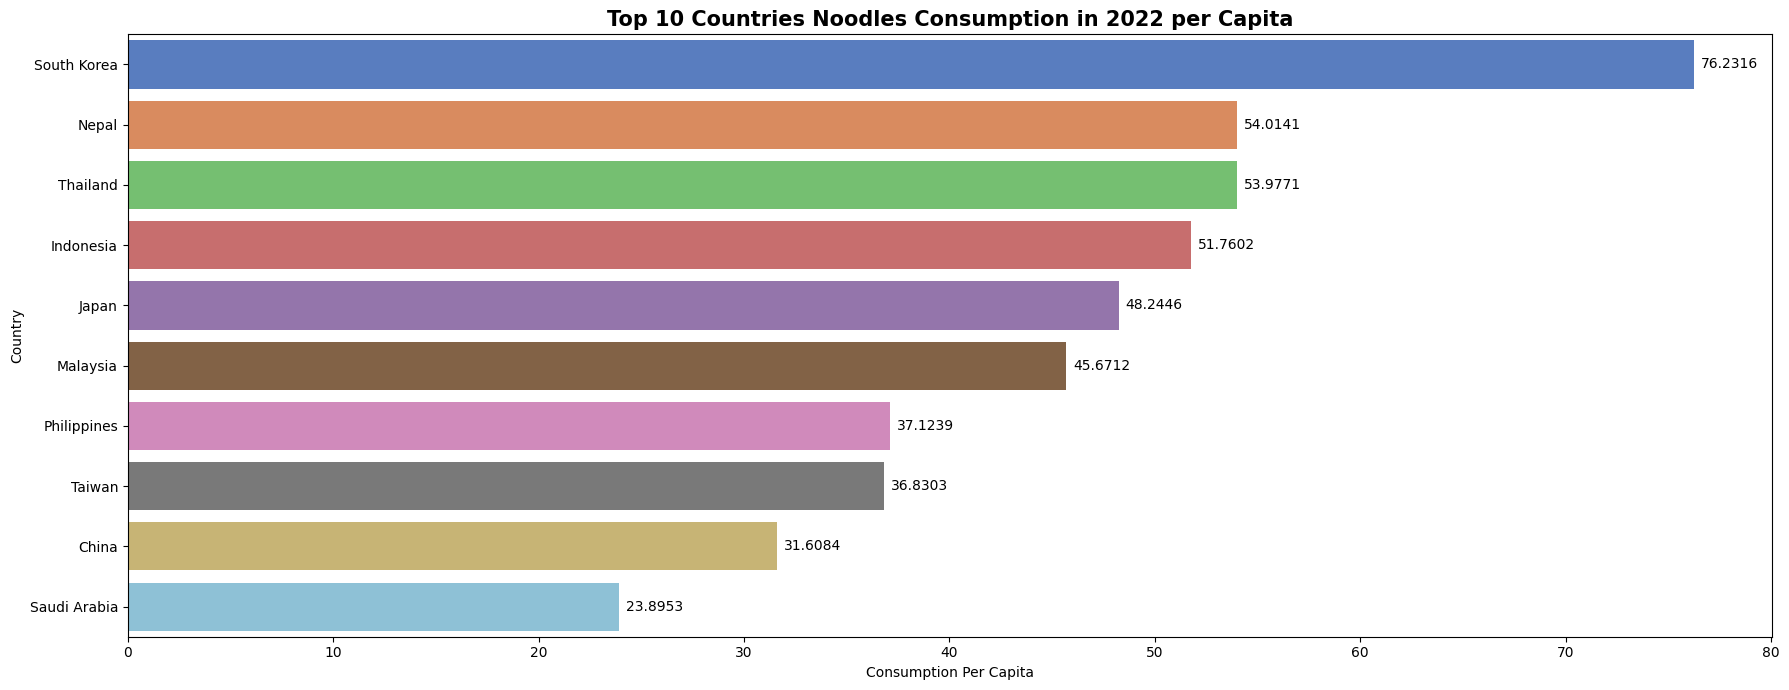

In [23]:
plt.figure(figsize=(18,7))
ax = sns.barplot(data = df.sort_values(by="percapita", ascending = False).head(10), y = "Country/Region", 
                 x = "percapita", palette = "muted")
ax.bar_label(ax.containers[0], color = "black", padding=5)
plt.title("Top 10 Countries Noodles Consumption in 2022 per Capita", 
          fontdict={"fontsize" : 15,
                   "fontweight": "bold"})
plt.ylabel("Country")
plt.xlabel("Consumption Per Capita")
plt.tight_layout()
plt.show()

It can be seen that the 10 countries that spend the most money on noodle consumption per capita are dominated by countries on the Asian continent. The first position is led by South Korea, followed by Nepal, Thailand and Indonesia

## Insight

1. After EDA was carried out, it was seen that consumption of instant noodles increased every year
2. For the continent that consumes the most instant noodles, it is dominated by the Asian continent, perhaps one of the biggest factors is the large population and cultural factors on the Asian continent which consumes instant noodles because the price is cheap and the food is easy, fast and simple to serve.
3. The people who spend the most money consuming instant noodles are China, Indonesia and India.
4. However, after looking at instant noodle consumption per capita, it is South Korea, Nepal and Thailand that dominate